<a href="https://colab.research.google.com/github/Javorai/Coding-Dojo-Core/blob/main/Visualizaci%C3%B3n_para_ciencia_de_datos_Proyecto_1_Parte_V_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyecto 1-Parte V (Core)**
**Análisis y Predicción de Ventas en una Tienda de Retail**

**Parte V: Exploración y Visualización de Datos Avanzada**

En esta quinta parte del proyecto, vamos a expandir nuestro análisis exploratorio de datos (EDA) y visualización utilizando técnicas avanzadas. Aplicaremos todo lo que hemos aprendido hasta ahora, incluyendo cuadrículas, leyendas, anotaciones, flechas, y subplots, para obtener una comprensión más profunda de nuestro conjunto de datos de ventas.

**Instrucciones**

1.  **Continuar desde la Parte IV**
* Asegúrate de tener el DataFrame df ya cargado y preparado desde la Parte IV.
2.  **Exploración de Datos Avanzada**
* Realiza un análisis de correlación y crea un mapa de calor para visualizar las relaciones entre las variables.
* Crea subplots para comparar diferentes variables clave.
Añade cuadrículas, leyendas, anotaciones y flechas a tus gráficos para mejorar la claridad y la información.
3.  **Generar un Tag en GitHub y Realizar una Presentación**
* **Generar un Tag en GitHub:** Después de completar el análisis y las visualizaciones, sube los cambios a una nueva rama en tu repositorio de GitHub, genera un Pull Request (PR) para revisión y finalmente crea un tag para esta versión del proyecto.
* **Realizar una Presentación:** Prepara una presentación en slides que resuma tu análisis y visualizaciones. La presentación debe incluir:
  * Introducción y objetivos del proyecto.
  * Descripción del conjunto de datos.
  * Principales análisis y hallazgos.
  * Visualizaciones clave con explicación.
  * Conclusiones y recomendaciones.

In [1]:
#Importación de datos y librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "/content/drive/MyDrive/Bootcamp Coding Dojo/DataScience/Tareas Core/Archivos CSV-Tareas/retail_sales_dataset.csv"
df = pd.read_csv(url)
df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


In [ ]:
# Filtrar datos inapropiados basados en los rangos especificados
df = df[(df['Age'] >= 18) & (df['Age'] <= 64)]
df = df[(df['Quantity'] >= 1) & (df['Quantity'] <= 4)]
df = df[(df['Price per Unit'] >= 25) & (df['Total Amount'] <= 2000)]

# Asegurarse de que las columnas tengan los tipos de datos correctos
df['Transaction ID'] = df['Transaction ID'].astype(int)
df['Date'] = pd.to_datetime(df['Date'])
df['Customer ID'] = df['Customer ID'].astype(str)
df['Gender'] = df['Gender'].str.lower()
df['Age'] = df['Age'].astype(int)
df['Product Category'] = df['Product Category'].str.title()
df['Quantity'] = df['Quantity'].astype(int)
df['Price per Unit'] = df['Price per Unit'].astype(float)
df['Total Amount'] = df['Total Amount'].astype(float)

print(df.info())

In [ ]:
# Estadísticas descriptivas
print(df.describe())
print(df['Gender'].value_counts())
print(df['Product Category'].value_counts())

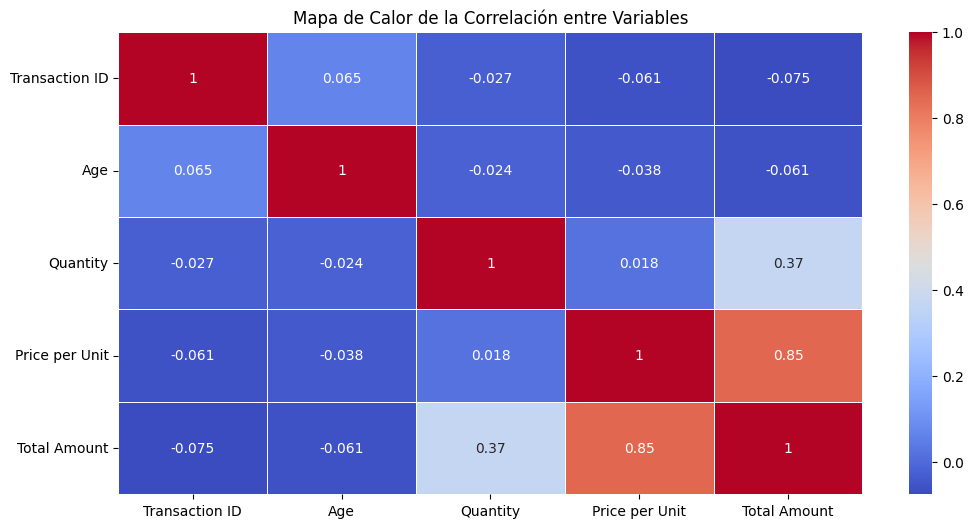

In [8]:
# Calcular la matriz de correlación solo para columnas numéricas
correlation_matrix = df.select_dtypes(include=np.number).corr()

# Crear un mapa de calor
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de Calor de la Correlación entre Variables')
plt.savefig('/content/drive/MyDrive/Bootcamp Coding Dojo/DataScience/Tareas Core/PNG Proyecto/correlation_matrix.png')
plt.show()

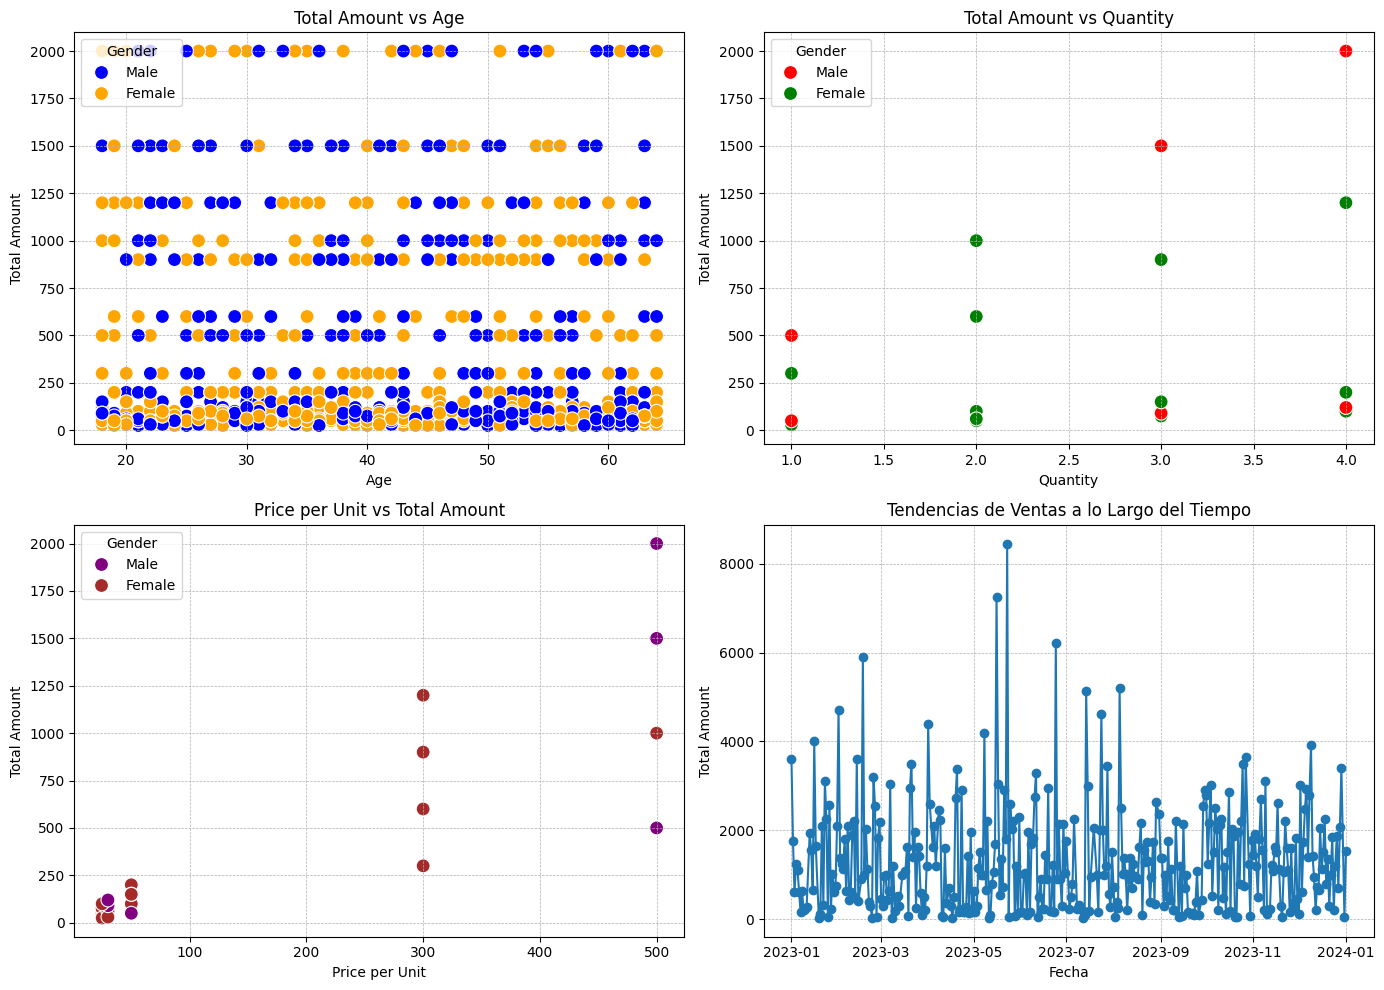

In [9]:
# Subplot 1: Total Amount vs Age
plt.figure(figsize=(14, 10))

# Total Amount vs Age
plt.subplot(2, 2, 1)
sns.scatterplot(data=df, x='Age', y='Total Amount', hue='Gender', palette=['blue', 'orange'], s=100)
plt.title('Total Amount vs Age')
plt.xlabel('Age')
plt.ylabel('Total Amount')
plt.legend(loc='upper left', title='Gender')
plt.grid(True, linestyle='--', linewidth=0.5)

# Total Amount vs Quantity
plt.subplot(2, 2, 2)
sns.scatterplot(data=df, x='Quantity', y='Total Amount', hue='Gender', palette=['red', 'green'], s=100)
plt.title('Total Amount vs Quantity')
plt.xlabel('Quantity')
plt.ylabel('Total Amount')
plt.legend(loc='upper left', title='Gender')
plt.grid(True, linestyle='--', linewidth=0.5)

# Price per Unit vs Total Amount
plt.subplot(2, 2, 3)
sns.scatterplot(data=df, x='Price per Unit', y='Total Amount', hue='Gender', palette=['purple', 'brown'], s=100)
plt.title('Price per Unit vs Total Amount')
plt.xlabel('Price per Unit')
plt.ylabel('Total Amount')
plt.legend(loc='upper left', title='Gender')
plt.grid(True, linestyle='--', linewidth=0.5)

# Total Amount vs Date
df['Date'] = pd.to_datetime(df['Date'])# Convertir la columna 'Date' a tipo datetime
plt.subplot(2, 2, 4)
ventas_por_fecha = df.groupby('Date')['Total Amount'].sum().reset_index()
plt.plot(ventas_por_fecha['Date'], ventas_por_fecha['Total Amount'], marker='o')
plt.title('Tendencias de Ventas a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Total Amount')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.savefig('/content/drive/MyDrive/Bootcamp Coding Dojo/DataScience/Tareas Core/PNG Proyecto/subplots.png')
plt.tight_layout()
plt.show()